# pre-trained 모델
https://github.com/Golbstein/Fingernails-Segmentation
---



#drive mount(이미지 구글드라이브안에있음)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#라이브러리 + 구글드라이브 주소씀 / utils_nails -> py파일인데, 코랩이랑 호환안되는거있어서 py파일뜯어서 안되는거 수정함

In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/capstone/segmentation/fs/fs')

%matplotlib inline
import utils_nails
from utils_nails import *

datasetpath='/content/gdrive/MyDrive/capstone/segmentation/fs/fs/nails.tar.gz'

import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

#model이 class로정의 -> tar(zip)파일 되어있는거 주소 불러오기 -> unet

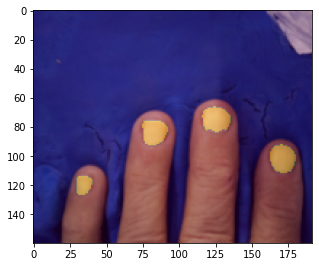

In [ ]:
# initialize instance
# dataset = datasetpath
seg = fingernailseg(datasetpath)
# show random example from training set
seg.plot_example(np.random.randint(seg.X_train.__len__()))
# create U-Net model
seg.create_unet()

# unet->학부연수생때한거 U자모양이고, 사진많이필요없음 ->U자모형모델 ->대신 오래걸림(이미지 template matching처럼 이미지 복사하는거였나?)

#epoch 50인데 earlystopping있음 /대략 10분인데 시간없으면 그냥 py뜯어서 10으로수정해도됨

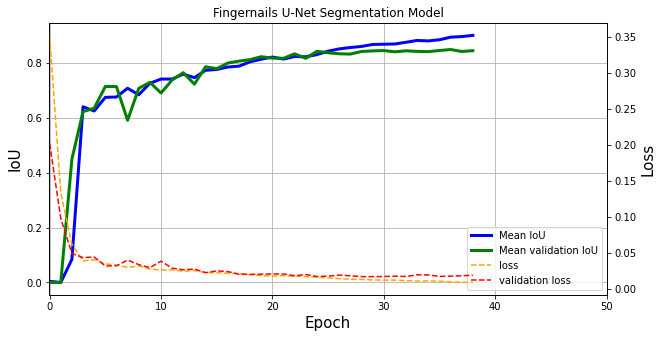

Epoch 00039: early stopping


In [ ]:
seg.fit()
seg.load_model()

# model.predict안에 함수를 따로정의해서 input 자체가 X_test임 -> raw그리고 그위에 mask덮은듯

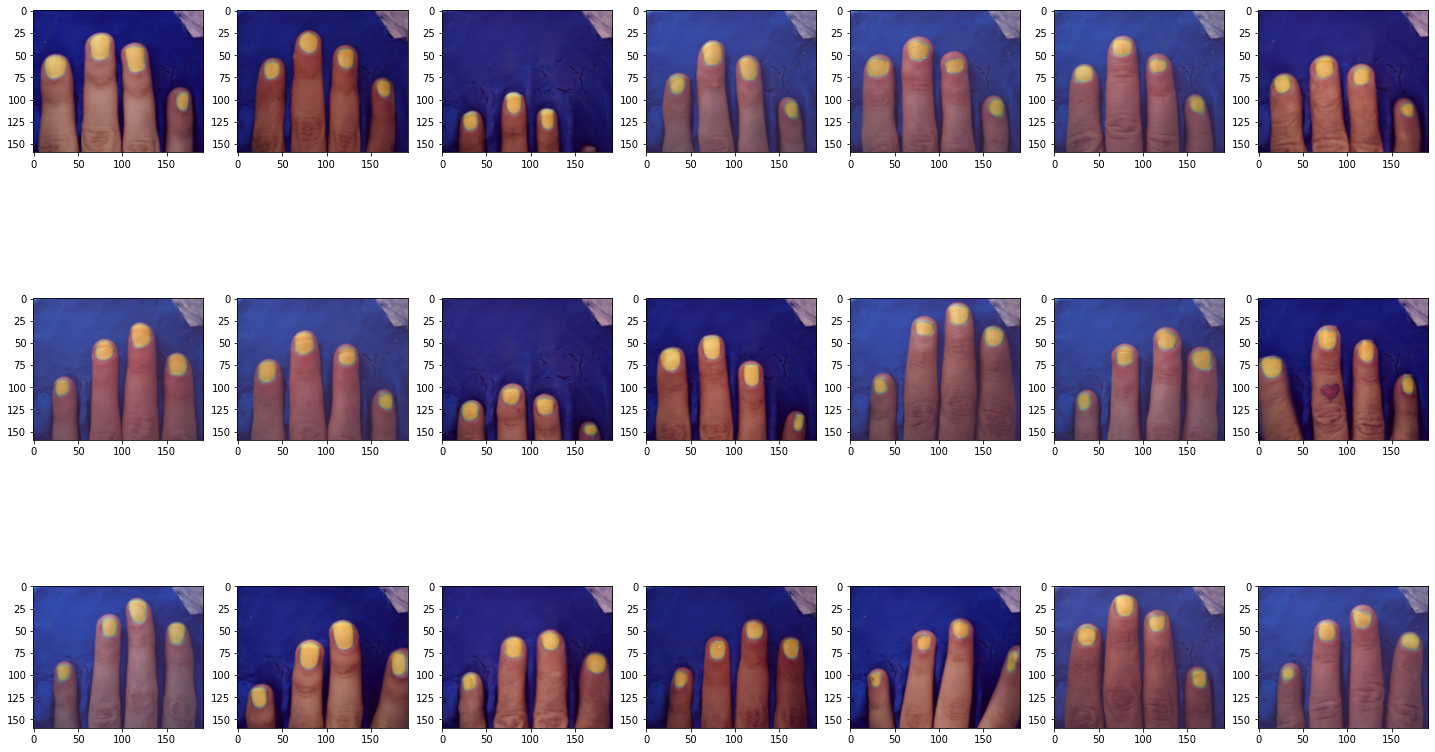

In [ ]:
mask = seg.predict()
raw = seg.X_test
plt.figure(figsize=(25,15))
for i in range(len(mask)):
    plt.subplot(3, 7, i+1)
    plt.imshow(raw[i])
    plt.imshow(mask[i,:,:,0], alpha=0.3)

#mask된거 중 첫장/ 마지막 채널이 1개임

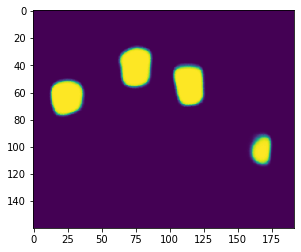

In [ ]:
plt.imshow(mask[0,:,:,-1])

# 예측후에 X_test가 21장 -> 21장중 random으로해서 한장 raw그리고 그위에 mask

Text(0.5, 1.0, 'Fingernails segmentation of test image')

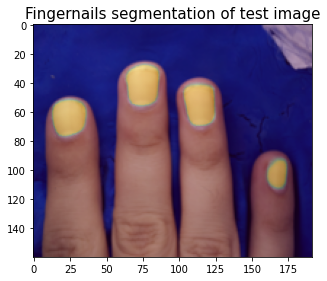

In [ ]:
mask = seg.predict()
plt.figure(figsize=(5,5))

rand_image = np.random.randint(seg.X_test.__len__())
plt.imshow(raw[rand_image,:,:,:])
plt.imshow(mask[rand_image,:,:,0], alpha=0.3)
plt.title('Fingernails segmentation of test image', fontsize=15)

# 제공되는 이미지로 실험 -> 마스크한장,raw한장으로 symmetric_difference해보려했는데 일단 set이아님 그리고 None,160,192,3 vs 32,192,3 이었던거생각해서 애초에 input이 list구나 다시보게됨

In [ ]:
#제공이미지
b=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/mk.png')
c=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/rw.png')
# d=set(b).symmetric_difference(c)
c=np.array(c.resize((192,160)))
c=np.array(c).astype('float32')
c/=255

# 그냥손 +검은색배경손해봤는데 안됨 -> zip파일풀어서 특징보니까 파란색 -> 맨처음에 스택오버플로우에서 봤던것처럼 크로마키색이 그린인 이유가 있겠구나 ->노트북에 파란색배경띄워서 1313번사진저장

In [ ]:
#내손사진
a=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/11.jpg')
b=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/114.jpg')
c=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/0.jpg')
d=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/88.jpg')
e=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/000.jpg')
f=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/1313.jpg')
g=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/14144.jpg')
h=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/99.jpg')
test=[]
a=np.array(a.resize((192,160)))
b=np.array(b.resize((192,160)))
c=np.array(c.resize((192,160)))
d=np.array(d.resize((192,160)))
e=np.array(e.resize((192,160)))
f=np.array(f.resize((192,160)))
g=np.array(g.resize((192,160)))
h=np.array(h.resize((192,160)))
test.append(a)
test.append(b)
test.append(c)
test.append(d)
test.append(e)
test.append(f)
test.append(g)
test.append(h)
test=np.array(test).astype('float32')
test/=255

ans=seg.model.predict(test,batch_size=4,verbose=0)

# 밑의 두사진이 1313번 mask, raw 이미지 

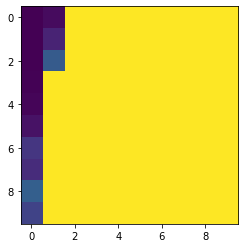

In [ ]:
plt.imshow(ans[-3,65:75,35:45,-1])

In [ ]:
aaa=ans[-1,:,:,-1]

In [ ]:
aaa[0.001<aaa]=1000

In [ ]:
aaa[aaa<1000]=0

In [ ]:
np.max(aaa)

0.19562174

In [ ]:
bbb=ans[-3,:,:,-1]

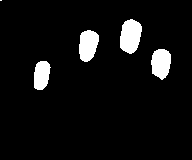

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(aaa)

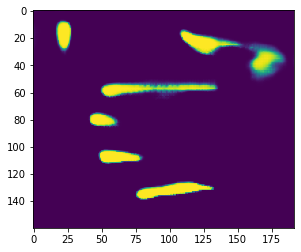

In [ ]:
plt.imshow(aaa)

In [ ]:
ans[-3,65:75,35:45,-1]

array([[5.1868274e-06, 5.5580281e-02, 8.2059407e-01, 9.8703229e-01,
        9.9908137e-01, 9.9994171e-01, 9.9997020e-01, 9.9998665e-01,
        9.9997878e-01, 9.9996996e-01],
       [3.2286748e-04, 1.9562174e-01, 8.6091512e-01, 9.9755257e-01,
        9.9972123e-01, 9.9997330e-01, 9.9998546e-01, 9.9999571e-01,
        9.9999225e-01, 9.9999321e-01],
       [1.2625236e-03, 5.7574230e-01, 9.7674757e-01, 9.9973577e-01,
        9.9996912e-01, 9.9999666e-01, 9.9999785e-01, 9.9999928e-01,
        9.9999869e-01, 9.9999881e-01],
       [8.2843630e-03, 8.7162775e-01, 9.8583049e-01, 9.9981052e-01,
        9.9996114e-01, 9.9999547e-01, 9.9999702e-01, 9.9999917e-01,
        9.9999845e-01, 9.9999893e-01],
       [3.1031433e-02, 8.9826101e-01, 9.9683410e-01, 9.9995840e-01,
        9.9999130e-01, 9.9999893e-01, 9.9999917e-01, 9.9999976e-01,
        9.9999952e-01, 9.9999952e-01],
       [9.9676788e-02, 9.7136283e-01, 9.9732202e-01, 9.9994314e-01,
        9.9998379e-01, 9.9999809e-01, 9.9999845e-01, 9.99

In [ ]:
ans[-3,:,:,-1][0]

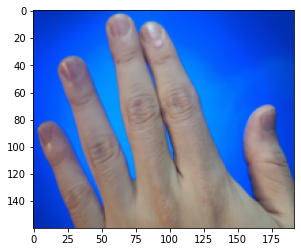

In [ ]:
plt.imshow(test[-2,:,:])

# TODO
- predict된 이미지 각 채널의 의미?(특히마지막)  
- masking된거 alpha의미?+조절해야함/색깔못바꾸나  
- 승환 : 파란색대신 트레인이미지의 배경에 노이즈를 주거나 배경을 바꾸면?  
# 과정
- 일반화질동영상->프레임별사진->리사이즈->파란색배경->mask좌표->gan합성->원래이미지에합성->동영상변환  
# 사실(시도)
- 1313번 사진 화질낮아도 ㄱㅊ은듯  
- 이미지오픈->리사이즈->리스트어펜드->리스트 array로만들고 float32 ->나누기 255  
# 참고
- 원그렸던거 참고해서 모델합치기?  
- 3D프린팅 및헤나? 문신vs헤나/염색vs헤어 매니큐어같은관계  
- 자신에게맞는손 및손톱인식->네일아트선택->3D프린팅(헤나or젤네일키트)/기본형이 아닌 내손에 맞는사이즈/메이커스페이스(무료),굴곡?
- 11월2일부터멘토붙음 ->질문할거정하기

In [ ]:
# 일반 이미지 배경 지우기 -> 파란배경으로 변환
import cv2
from google.colab.patches import cv2_imshow
iimmgg=cv2.imread('114.jpg')
cv2_imshow(iimmgg)

AttributeError: ignored

In [ ]:
img=cv2.imread('nng.jpg')


#링크

- https://velog.io/@jaehyeong/OpenCV%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%9C-%EA%B8%B0%EC%B4%88-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%B2%98%EB%A6%AC-with-Python  

- https://webnautes.tistory.com/1248

#방법

1.일반화질동영상 ->프레임별사진 ->이미지리사이즈 , 파란색배경->mask좌표 구하기 -> GAN합성 ->원래이미지에합성->동영상변환 정도로 생각했고

2.일반배경사진학습

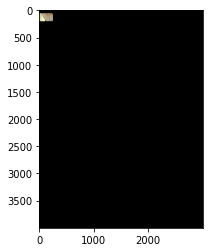

In [ ]:
import cv2
image_bgr = cv2.imread('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/114.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# 사각형 좌표: 시작점의 x,y  ,넢이, 너비
rectangle = (0, 56, 256, 150)

# 초기 마스크 생성
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
           mask,       # 마스크
           rectangle,  # 사각형
           bgdModel,   # 배경을 위한 임시 배열
           fgdModel,   # 전경을 위한 임시 배열 
           5,          # 반복 횟수
           cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화
# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱행 배경을 제외
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# plot
plt.imshow(image_rgb_nobg)
plt.show()

In [ ]:
import os
from io import BytesIO

import numpy as np
from PIL import Image

import tensorflow as tf
import sys
import datetime


class DeepLabModel(object):
  """Class to load deeplab model and run inference."""

  INPUT_TENSOR_NAME = 'ImageTensor:0'
  OUTPUT_TENSOR_NAME = 'SemanticPredictions:0'
  INPUT_SIZE = 513
  FROZEN_GRAPH_NAME = 'frozen_inference_graph'

  def __init__(self, tarball_path):
    """Creates and loads pretrained deeplab model."""
    self.graph = tf.Graph()

    graph_def = None
    graph_def = tf.GraphDef.FromString(open(tarball_path + "/frozen_inference_graph.pb", "rb").read()) 

    if graph_def is None:
      raise RuntimeError('Cannot find inference graph in tar archive.')

    with self.graph.as_default():
      tf.import_graph_def(graph_def, name='')

    self.sess = tf.Session(graph=self.graph)

  def run(self, image):
    """Runs inference on a single image.
    Args:
      image: A PIL.Image object, raw input image.
    Returns:
      resized_image: RGB image resized from original input image.
      seg_map: Segmentation map of `resized_image`.
    """
    start = datetime.datetime.now()

    width, height = image.size
    resize_ratio = 1.0 * self.INPUT_SIZE / max(width, height)
    target_size = (int(resize_ratio * width), int(resize_ratio * height))
    resized_image = image.convert('RGB').resize(target_size, Image.ANTIALIAS)
    batch_seg_map = self.sess.run(
        self.OUTPUT_TENSOR_NAME,
        feed_dict={self.INPUT_TENSOR_NAME: [np.asarray(resized_image)]})
    seg_map = batch_seg_map[0]

    end = datetime.datetime.now()

    diff = end - start
    print("Time taken to evaluate segmentation is : " + str(diff))

    return resized_image, seg_map

def drawSegment(baseImg, matImg):
  width, height = baseImg.size
  dummyImg = np.zeros([height, width, 4], dtype=np.uint8)
  for x in range(width):
            for y in range(height):
                color = matImg[y,x]
                (r,g,b) = baseImg.getpixel((x,y))
                if color == 0:
                    dummyImg[y,x,3] = 0
                else :
                    dummyImg[y,x] = [r,g,b,255]
  img = Image.fromarray(dummyImg)
  img.save(outputFilePath)


inputFilePath = sys.argv[1]
outputFilePath = sys.argv[2]

if inputFilePath is None or outputFilePath is None:
  print("Bad parameters. Please specify input file path and output file path")
  exit()

modelType = "mobile_net_model"
if len(sys.argv) > 3 and sys.argv[3] == "1":
  modelType = "xception_model"

MODEL = DeepLabModel(modelType)
print('model loaded successfully : ' + modelType)

def run_visualization(filepath):
  """Inferences DeepLab model and visualizes result."""
  try:
  	print("Trying to open : " + sys.argv[1])
  	# f = open(sys.argv[1])
  	jpeg_str = open(filepath, "rb").read()
  	orignal_im = Image.open(BytesIO(jpeg_str))
  except IOError:
    print('Cannot retrieve image. Please check file: ' + filepath)
    return

  print('running deeplab on image %s...' % filepath)
  resized_im, seg_map = MODEL.run(orignal_im)

  # vis_segmentation(resized_im, seg_map)
  drawSegment(resized_im, seg_map)

run_visualization(inputFilePath)

AttributeError: ignored

1109 피드백
---
후처리 필요 -> opencv 모폴로지 프로세싱  
데이터 많으면 unet 가능  
일단 segmentation부터->실제보이는것처럼 / 제약줘도 ㄱㅊ(파란색배경은 좀..)  
배경제거하는건 어려움 ->손의 위치고정+배경다르면원래힘듦  
캐글처럼 깃허브 모두 검은색으로 마스킹? -->캐글+파란배경섞기+데이터추가  
데이터없을때 일부러 오버피팅  
손검출 ->칸투어,캐니엣지  
손모양고정하고 구하는게오래걸릴지 vs 손검출할지  
gpu키면 진짜빠름